# 목표 :
### 선형변환 class를 사용하여 선형변환이 여러 개 있는 문제를 품으로써 모듈화 구현으로 (전파, 역전파) 과정을 이해

# 
### 문제 : 아래와 같이 데이터 1개 [1, 1]가 주어졌을 때 여러 선형변환을 가지는 모델을 구현하여 학습하는 문제를 풀어보세요.

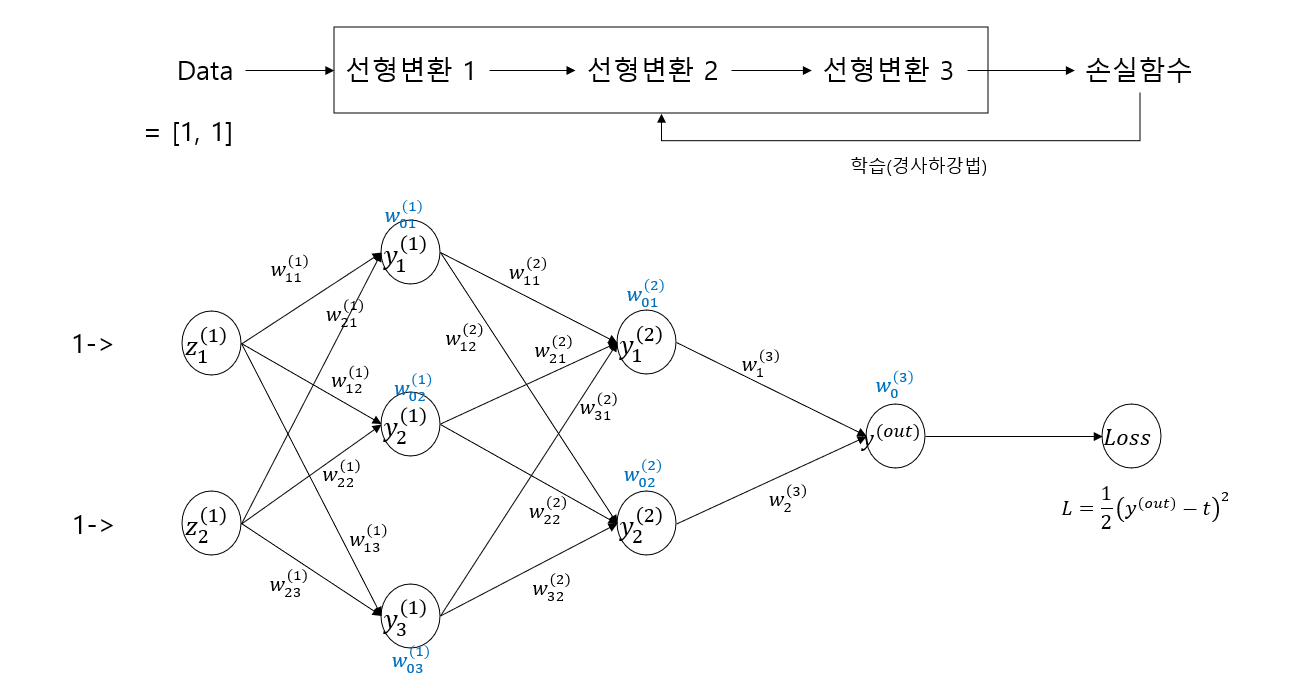
- input data [1, 1] 으로 데이터는 1개, 특징은 2개를 가지는 데이터.
- label (t) = 0 

# 
#### 문제 1. 위와 같이 1번째 선형변환(노드 3개), 2번째 선형변환(노드 2개), 마지막 선형변환(노드 1개)를 가지고, MSE 손실함수를 가지는 모델을 설계하고 전파와 역전파를 각각 출력해보세요.
1. (Affine 과 MeanSquaredError class 사용)
2. Affine의 각 가중치는 정규분포로 초기화, 절편은 0 사용

In [224]:
import numpy as np

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.original_x_shape = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx
    
class MeanSquaredError:
    def __init__(self):
        self.loss = None  # 손실 값
        self.y = None     # 예측값
        self.t = None     # 정답값

    def forward(self, y, t):
        self.y = y
        self.t = t
        # 오차 계산
        self.loss = 0.5 * np.mean((self.y - self.t) ** 2)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) * dout / batch_size
        return dx

In [225]:

W = np.random.randn(2, 1)
b = np.zeros(1,)
affine = Affine(W,b)
mse = MeanSquaredError()

z = np.array([1, 1])
z = np.reshape(z, (1, -1))
print(z)
print(np.shape(z))

t = np.array([0])
print(t)

out = affine.forward(z)
print(out)
out = mse.forward(out, t)
print("손실값 : ", out)

dout = np.ones(1)
dout = mse.backward(dout)
print("mse 미분 : ", dout)
dout = affine.backward(dout)
print("dx : ", dout)

print(affine.dW)
print(affine.db)


[[1 1]]
(1, 2)
[0]
[[2.45445213]]
손실값 :  3.0121676240943227
mse 미분 :  [[2.45445213]]
dx :  [[4.7643228  1.26001245]]
[[2.45445213]
 [2.45445213]]
[2.45445213]


In [226]:
# 1번째 선형변환(노드 3개), 2번째 선형변환(노드 2개), 마지막 선형변환(노드 1개)를 가지고, MSE 손실함수를 가지는 모델을 설계하고 전파와 역전파를 각각 출력해보세요.
# 1. (Affine 과 MeanSquaredError class 사용)
# 2. Affine의 각 가중치는 정규분포로 초기화, 절편은 0 사용

W1 = np.random.randn(2, 3)
b1 = np.zeros(3,)
affine1 = Affine(W1, b1)

W2 = np.random.randn(3, 2)
b2 = np.zeros(2,)
affine2 = Affine(W2, b2)

W3 = np.random.randn(2, 1)
b3 = np.zeros(1,)
affine3 = Affine(W3, b3)

mse = MeanSquaredError()

y1 = affine1.forward(z)
y2 = affine2.forward(y1)
y3 = affine3.forward(y2)

print("1번째 선형변환 가중치 행렬 : \n", affine1.W)
print("1번째 선형변환 절편 벡터 : \n", affine1.b)
print("2번째 선형변환 가중치 행렬 : \n", affine2.W)
print("2번째 선형변환 절편 벡터 : \n", affine2.b)
print("3번째 선형변환 가중치 행렬 : \n", affine3.W)
print("3번째 선형변환 절편 벡터 : \n", affine3.b)

loss = mse.forward(y3, t)
print("손실값 : ", loss)

dout = np.ones(1,)
dout = mse.backward(dout)
print("mse 미분 : ", dout)

dout = affine3.backward(dout)
print("선형변환3 역전파 dx \n: ", dout)
print("선형변환3 역전파 affine3.dW : \n", affine3.dW)
print("선형변환3 역전파 affine3.db : \n", affine3.db)
dout = affine2.backward(dout)
print("선형변환2 역전파 dx : \n", dout)
print("선형변환2 역전파 affine2.dW : \n", affine2.dW)
print("선형변환2 역전파 affine2.db : \n", affine2.db)
dout = affine1.backward(dout)
print("선형변환1 역전파 dx \n: ", dout)
print("선형변환1 역전파 affine1.dW : \n", affine1.dW)
print("선형변환1 역전파 affine1.db : \n", affine1.db)



1번째 선형변환 가중치 행렬 : 
 [[ 1.83175718 -0.48600473  1.24757541]
 [ 2.36125026 -1.33435019  0.24249447]]
1번째 선형변환 절편 벡터 : 
 [0. 0. 0.]
2번째 선형변환 가중치 행렬 : 
 [[ 2.82422896 -0.23856637]
 [-0.6677911  -0.32533376]
 [-0.30871813  1.14133244]]
2번째 선형변환 절편 벡터 : 
 [0. 0.]
3번째 선형변환 가중치 행렬 : 
 [[0.30889837]
 [0.08041833]]
3번째 선형변환 절편 벡터 : 
 [0.]
손실값 :  7.981333467858967
mse 미분 :  [[3.99533064]]
선형변환3 역전파 dx 
:  [[1.23415111 0.32129783]]
선형변환3 역전파 affine3.dW : 
 [[50.3316503 ]
 [ 5.16427432]]
선형변환3 역전파 affine3.db : 
 [3.99533064]
선형변환2 역전파 dx : 
 [[ 3.40887446 -0.92868416 -0.0142972 ]]
선형변환2 역전파 affine2.dW : 
 [[ 5.1748048   1.34720418]
 [-2.24659304 -0.58487608]
 [ 1.83897141  0.47875622]]
선형변환2 역전파 affine2.db : 
 [1.23415111 0.32129783]
선형변환1 역전파 dx 
:  [[6.67773833 9.28492861]]
선형변환1 역전파 affine1.dW : 
 [[ 3.40887446 -0.92868416 -0.0142972 ]
 [ 3.40887446 -0.92868416 -0.0142972 ]]
선형변환1 역전파 affine1.db : 
 [ 3.40887446 -0.92868416 -0.0142972 ]


#### 문제 2. 모델을 아래와 같은 조건으로 학습하세요.
- 조건 :    
    1. 학습률 lr = 0.01
    2. 100번의 경사하강법 수행
    3. 각 1번의 업데이트마다 모델의 예측값과, 손실값 출력


In [227]:
lr = 0.01
for i in range(100):
    y1 = affine1.forward(z)
    y2 = affine2.forward(y1)
    y3 = affine3.forward(y2)
    print(i, "모델 예측값 : ", np.round(y3, 2))
    loss = mse.forward(y3, t)
    print(i, "손실값 : ", np.round(loss, 2))

    dout = np.ones(1,)
    dout = mse.backward(dout)
    dout = affine3.backward(dout)
    dout = affine2.backward(dout)
    dout = affine1.backward(dout)

    affine3.W = affine3.W - lr * affine3.dW
    affine3.b = affine3.b - lr * affine3.db
    affine2.W = affine2.W - lr * affine2.dW
    affine2.b = affine2.b - lr * affine2.db
    affine1.W = affine1.W - lr * affine1.dW
    affine1.b = affine1.b - lr * affine1.db

0 모델 예측값 :  [[4.]]
0 손실값 :  7.98
1 모델 예측값 :  [[-2.34]]
1 손실값 :  2.73
2 모델 예측값 :  [[1.07]]
2 손실값 :  0.57
3 모델 예측값 :  [[-0.44]]
3 손실값 :  0.1
4 모델 예측값 :  [[0.18]]
4 손실값 :  0.02
5 모델 예측값 :  [[-0.07]]
5 손실값 :  0.0
6 모델 예측값 :  [[0.03]]
6 손실값 :  0.0
7 모델 예측값 :  [[-0.01]]
7 손실값 :  0.0
8 모델 예측값 :  [[0.]]
8 손실값 :  0.0
9 모델 예측값 :  [[-0.]]
9 손실값 :  0.0
10 모델 예측값 :  [[0.]]
10 손실값 :  0.0
11 모델 예측값 :  [[-0.]]
11 손실값 :  0.0
12 모델 예측값 :  [[0.]]
12 손실값 :  0.0
13 모델 예측값 :  [[-0.]]
13 손실값 :  0.0
14 모델 예측값 :  [[0.]]
14 손실값 :  0.0
15 모델 예측값 :  [[-0.]]
15 손실값 :  0.0
16 모델 예측값 :  [[0.]]
16 손실값 :  0.0
17 모델 예측값 :  [[-0.]]
17 손실값 :  0.0
18 모델 예측값 :  [[0.]]
18 손실값 :  0.0
19 모델 예측값 :  [[-0.]]
19 손실값 :  0.0
20 모델 예측값 :  [[0.]]
20 손실값 :  0.0
21 모델 예측값 :  [[-0.]]
21 손실값 :  0.0
22 모델 예측값 :  [[0.]]
22 손실값 :  0.0
23 모델 예측값 :  [[-0.]]
23 손실값 :  0.0
24 모델 예측값 :  [[0.]]
24 손실값 :  0.0
25 모델 예측값 :  [[-0.]]
25 손실값 :  0.0
26 모델 예측값 :  [[0.]]
26 손실값 :  0.0
27 모델 예측값 :  [[-0.]]
27 손실값 :  0.0
28 모델 예측값 :  [[0.]]
28 손실값 :  0.0
29